In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

!pip install millify
from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS


Defaulting to user installation because normal site-packages is not writeable


Here we import a covid19 tweets(24,Jul,2020-30,Aug,2020) dataset 

In [2]:
df=pd.read_csv("covid19_tweets.csv")
df

user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
...                                                   ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
0       2017-05-26 05:46:42             624           950            18775   
1       2009-04-16 20:06:23            2253          1677               24   
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
...                     ...             ...           ...              ...   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
0               False  2020-07-25 12:27:21   
1                True  2020-07-25 12:27:17   
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
...               ...                  ...   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags               source  is_retweet  
0                                     NaN   Twitter for iPhone       False  
1                                     NaN  Twitter for Android       False  
2                             ['COVID19']  Twitter for Android       False  
3           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


There are some missing values in the 'user_location', 'user_description', 'hashtags', and 'source' columns

In [4]:
#take a look of the missing data
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

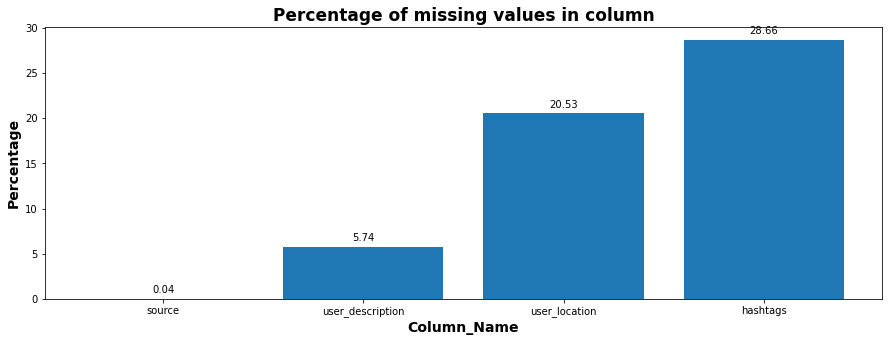

In [5]:
# Plot the missing values percentages
plt.figure(figsize=(15, 5))
bar_plot = plt.bar(missing_values['column'], missing_values['percent'])

# Annotate the bar plot with the percentage values
for rect in bar_plot:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 9), textcoords='offset points', ha='center', va='center')

plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column", fontweight="bold", size=17)
plt.show()

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Su
[nltk_data]     Yunhua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

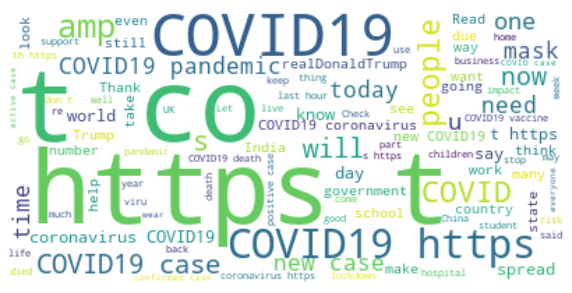

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your dataset is already in a DataFrame called df
# Combine all the text from the 'text' column into a single string
text_data = ' '.join(tweet for tweet in df['text'])

# Create the word cloud object
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Generate the word cloud from the text data
wordcloud.generate(text_data)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are too many urls in the dataset!

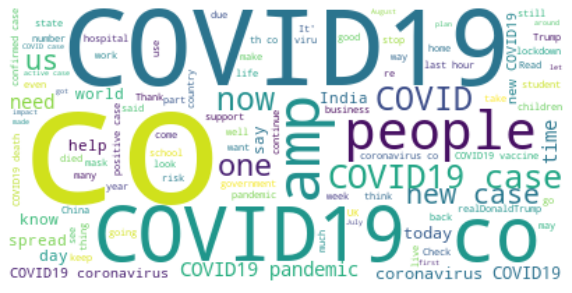

In [8]:
import re
# Function to preprocess the text
def preprocess_text(text):
    text = text.replace("http", "").replace("https", "").replace("will", "")
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove URLs
    text = re.sub(r"www\.[a-zA-Z0-9\-\._\?&=#%\/]+", "", text)
    text = re.sub(r"[a-zA-Z0-9\-\._]+\.com", "", text)
    return text

# Apply the preprocessing function to the 'text' column and combine all text into a single string
text_data = ' '.join(preprocess_text(tweet) for tweet in df['text'])

# Create the word cloud object
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Generate the word cloud from the text data
wordcloud.generate(text_data)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    
    # Add custom words to the stop words set
    custom_stop_words = {'the', 'of', 'from'}
    stop_words.update(custom_stop_words)
    
    text = text.replace("http", "").replace("https", "").replace("will", "")
    text = re.sub(r'\b\w\b', '', text)
    text = text.replace('&amp;', ' ')
    text = re.sub(r"www\.[a-zA-Z0-9\-\._\?&=#%\/]+", "", text)
    text = re.sub(r"[a-zA-Z0-9\-\._]+\.com", "", text)
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    
    return text

Let's make a wordcould for the hashtags:

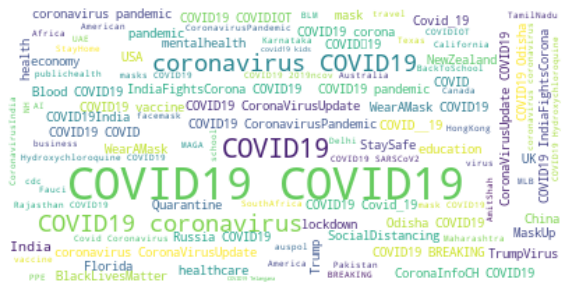

In [10]:
# Function to extract hashtags from the text
def extract_hashtags(text):
    hashtags = re.findall(r'\#\w+', text)
    return ' '.join(hashtags)

# Apply the extract_hashtags function to the 'text' column and combine all hashtags into a single string
hashtag_data = ' '.join(extract_hashtags(tweet) for tweet in df['text'])

# Create the word cloud object
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Generate the word cloud from the hashtag data
wordcloud.generate(hashtag_data)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

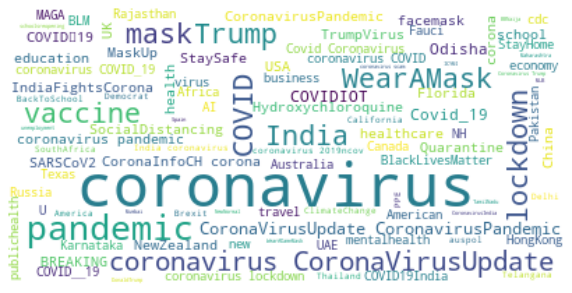

In [11]:
# Function to extract hashtags from the text
def extract_hashtags(text):
    hashtags = re.findall(r'\#\w+', text)
    hashtags = [hashtag for hashtag in hashtags if hashtag.lower() != '#covid19']
    return ' '.join(hashtags)

# Apply the extract_hashtags function to the 'text' column and combine all hashtags into a single string
hashtag_data = ' '.join(extract_hashtags(tweet) for tweet in df['text'])

# Create the word cloud object
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')

# Generate the word cloud from the hashtag data
wordcloud.generate(hashtag_data)

# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are some interesting words in the hashtags' wordcould: 'lockdown', 'Trump', 'WearAMask', 'mentalhealth', 'Vaccine', 'economy' and 'education' and many names of locations. It gave us some clues to futher explore!

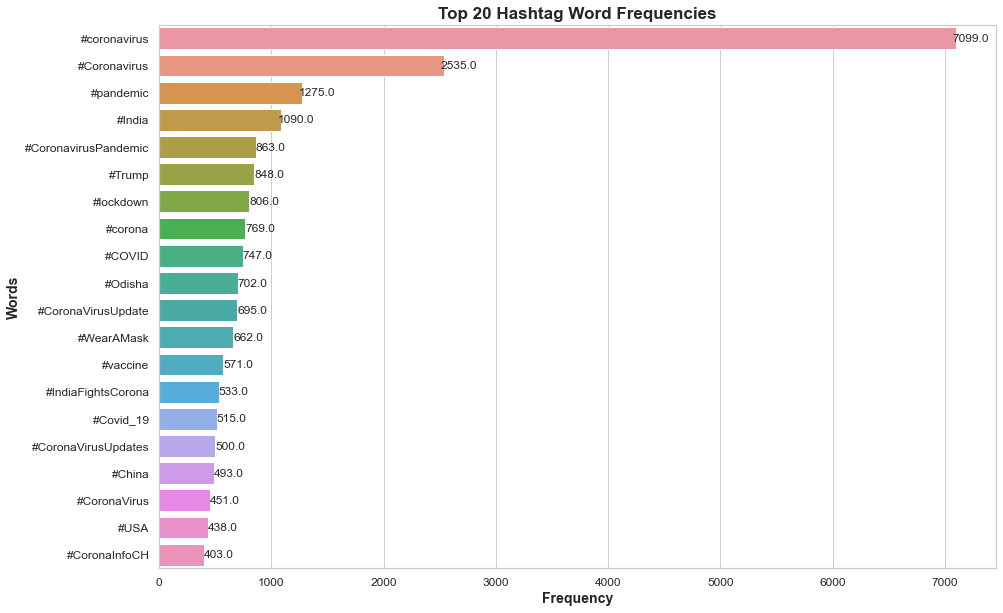

In [12]:
import seaborn as sns
from collections import Counter

# Extract hashtags and preprocess tweet text
hashtag_data = ' '.join(extract_hashtags(tweet) for tweet in df['text'])
text_data = ' '.join(preprocess_text(tweet) for tweet in df['text'])

# Get word frequencies for hashtags and tweet text
hashtag_word_freq = Counter(hashtag_data.split())
text_word_freq = Counter(text_data.split())

# Sort by frequency and take the top 20 words
top_hashtag_words = sorted(hashtag_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
top_text_words = sorted(text_word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

# Function to create horizontal bar plot for word frequencies using Seaborn
def plot_word_frequencies(words, title):
    words_df = pd.DataFrame(words, columns=['word', 'frequency'])
    
    plt.figure(figsize=(15, 10))
    sns.set(style='whitegrid', color_codes=True)
    bar_plot = sns.barplot(y='word', x='frequency', data=words_df)
    
    for index, rect in enumerate(bar_plot.containers[0]):
        width = rect.get_width()
        plt.annotate(f'{width}', xy=(width, rect.get_y() + rect.get_height() / 2),
                     xytext=(15, 0), textcoords='offset points', ha='center', va='center')
    
    plt.ylabel("Words", size=14, weight="bold")
    plt.xlabel("Frequency", size=14, weight="bold")
    plt.title(title, fontweight="bold", size=17)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.show()

# Create bar plots for hashtags and tweet text word frequencies
plot_word_frequencies(top_hashtag_words, "Top 20 Hashtag Word Frequencies")

In [13]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    
    # Add custom words to the stop words set
    custom_stop_words = {'the', 'of', 'from'}
    stop_words.update(custom_stop_words)
    
    text = text.replace("http", "").replace("https", "").replace("will", "")
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r"www\.[a-zA-Z0-9\-\._\?&=#%\/]+", "", text)
    text = re.sub(r"[a-zA-Z0-9\-\._]+\.com", "", text)
    
    # Remove hashtags
    text = re.sub(r"#\w+", "", text)

    # Remove non-word characters
    text = re.sub(r'\W+', ' ', text)
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    
    return text

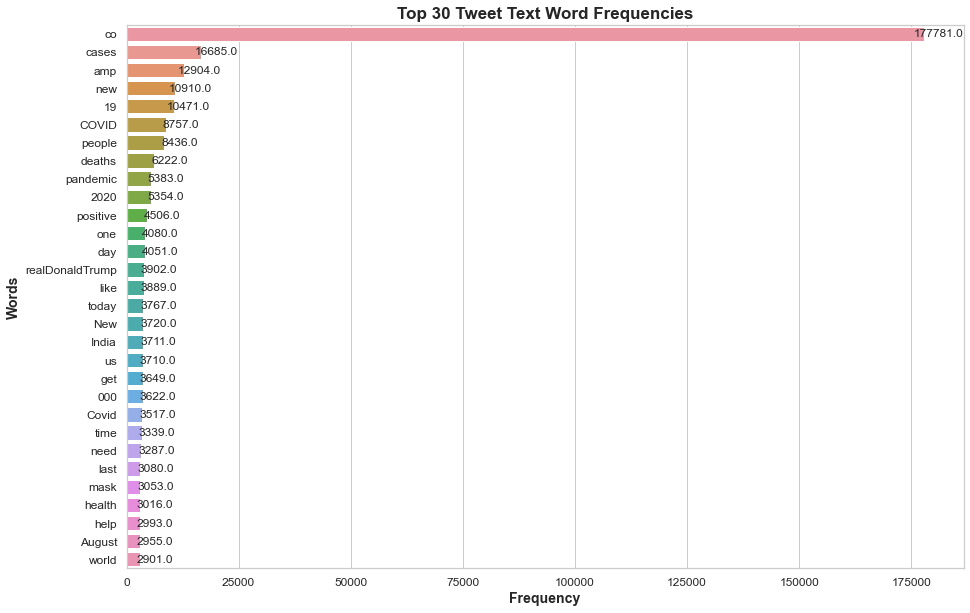

In [14]:
text_data = ' '.join(preprocess_text(tweet) for tweet in df['text'])
text_word_freq = Counter(text_data.split())
top_text_words = sorted(text_word_freq.items(), key=lambda x: x[1], reverse=True)[:30]
plot_word_frequencies(top_text_words, "Top 30 Tweet Text Word Frequencies")


Take a look at the locations:

In [15]:
loc_analysis = pd.DataFrame(df['user_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'user_location':'count'})

In [16]:
import plotly.graph_objs as go

data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
   "marker": {"colors": ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a1a1a', '#1f1f1f', '#333333', '#4d4d4d', '#666666']}
}

layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5)
fig.show()